In [1]:
import scanpy as sc

Run harmony.

In [2]:
adata = sc.read("/lustre/scratch126/cellgen/team205/kp9/jupyter/ac65/23-06-02-multimap/concatenated_raw.h5ad")

sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
#skipping in the interest of memory conservation
#adata.raw = adata
adata = adata[:, adata.var.highly_variable]

In [3]:
sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata)

/home/jovyan/my-conda-envs/d2c/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [4]:
import harmonypy as hm

ho = hm.run_harmony(adata.obsm["X_pca"], adata.obs, ["file_of_origin"])

2023-06-09 13:40:54,617 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2023-06-09 13:47:30,906 - harmonypy - INFO - sklearn.KMeans initialization complete.
2023-06-09 13:47:35,215 - harmonypy - INFO - Iteration 1 of 10
2023-06-09 13:55:43,575 - harmonypy - INFO - Iteration 2 of 10
2023-06-09 14:03:47,309 - harmonypy - INFO - Converged after 2 iterations


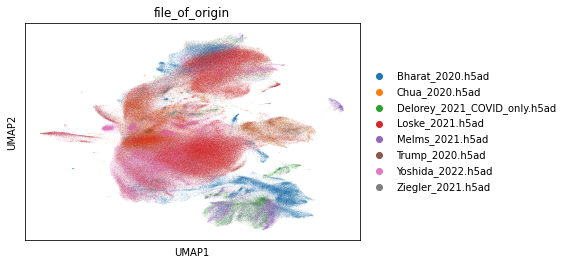

In [6]:
#harmony's adjusted coordinates live here, and have cells as columns
adata.obsm["X_harmony"] = ho.Z_corr.T

sc.pp.neighbors(adata, use_rep="X_harmony")
sc.tl.umap(adata)
sc.pl.umap(adata, color="file_of_origin")

Let's try to be a bit more efficient with object storage. Write out the coordinates only.

In [7]:
import pandas as pd

pd.DataFrame(adata.obsm["X_harmony"], index=adata.obs_names).to_csv("harmony_theta_1.csv")